In [1]:
import pandas as pd
import datetime
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn import neighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [25]:
dat_confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [26]:
dat_confirmed= pd.melt(dat_confirmed, 
                          id_vars=['UID','iso2','iso3','code3','FIPS','Admin2','Province_State',
                             'Country_Region','Lat','Long_','Combined_Key'], 
                           var_name='Date', value_name='Confirmed')
#dat_confirmed=dat_confirmed[['Province_State','Lat','Long_','Date','Confirmed']]

In [27]:
dat_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


In [28]:
dat_confirmed=dat_confirmed.groupby(['Province_State','Admin2','Date'])['Confirmed'].sum().reset_index()

In [29]:
for_brady=dat_confirmed[dat_confirmed['Admin2']=='Weber']
for_brady

,Province_State,Admin2,Date,Confirmed
1121984,Utah,Weber,1/1/21,0
1121985,Utah,Weber,1/10/21,0
1121986,Utah,Weber,1/11/21,0
1121987,Utah,Weber,1/12/21,0
1121988,Utah,Weber,1/13/21,0
1121989,Utah,Weber,1/14/21,0
1121990,Utah,Weber,1/15/21,0
1121991,Utah,Weber,1/16/21,0
1121992,Utah,Weber,1/17/21,0
1121993,Utah,Weber,1/18/21,0


In [18]:
dat_confirmed

,Province_State,Admin2,Date,Confirmed


In [101]:
dat_fatal=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

In [102]:
dat_fatal= pd.melt(dat_fatal, 
                          id_vars=['UID','iso2','iso3','code3','FIPS','Admin2','Province_State',
                             'Country_Region','Lat','Long_','Combined_Key', 'Population'], 
                           var_name='Date', value_name='Fatalities')
dat_fatal=dat_fatal[['Province_State','Lat','Long_','Population','Date','Fatalities']]

In [103]:
dat_fatal=dat_fatal.groupby(['Province_State','Date'])['Population','Fatalities'].sum().reset_index()

In [104]:
dat_fatal.head()

,Province_State,Date,Population,Fatalities
0,Alabama,1/22/20,4903185,0.0
1,Alabama,1/23/20,4903185,0.0
2,Alabama,1/24/20,4903185,0.0
3,Alabama,1/25/20,4903185,0.0
4,Alabama,1/26/20,4903185,0.0


In [105]:
data=pd.merge(dat_fatal,dat_confirmed,on=['Province_State','Date'])

In [106]:
data.columns=['State','Date','Population','Fatalities','Confirmed']

In [107]:
age_by_state=pd.read_csv("Agebystate.csv")
age_by_state['State']=age_by_state['State'].astype(str)
age_by_state.head()

,State,age
0,Maine,44.9
1,New Hampshire,43.0
2,Vermont,42.8
3,West Virginia,42.7
4,Florida,42.2


In [108]:
data.State = [c.strip() for c in data.State]
age_by_state.State = [c.strip() for c in age_by_state.State]

In [109]:
data=data.merge(age_by_state,on='State')

In [110]:
data.head()

,State,Date,Population,Fatalities,Confirmed,age
0,Alabama,1/22/20,4903185,0.0,0,39.2
1,Alabama,1/23/20,4903185,0.0,0,39.2
2,Alabama,1/24/20,4903185,0.0,0,39.2
3,Alabama,1/25/20,4903185,0.0,0,39.2
4,Alabama,1/26/20,4903185,0.0,0,39.2


In [111]:
data['Date']=pd.to_datetime(data['Date'],format='%m/%d/%y')
data=data.sort_values('Date')

In [112]:
data.head()

,State,Date,Population,Fatalities,Confirmed,age
0,Alabama,2020-01-22,4903185,0.0,0,39.2
4982,Wyoming,2020-01-22,578759,0.0,0,38.0
3008,New Jersey,2020-01-22,8882190,0.0,0,40.0
376,Arkansas,2020-01-22,3017804,0.0,0,38.3
2914,New Hampshire,2020-01-22,1359711,0.0,0,43.0


In [113]:
State_table=pd.read_csv("State table.csv")
State_table=State_table[['State','AgeAdjustedRate','Obesity Rate']]
State_table.columns=['State','CancerRate','Obesity']

In [114]:
Pop_den=pd.read_csv("PopDensity.csv")
Pop_den.State= [c.strip() for c in Pop_den.State]

In [115]:
data=data.merge(Pop_den,on='State')

In [116]:
data.head()

,State,Date,Population,Fatalities,Confirmed,age,PopDensity,Land Area
0,Alabama,2020-01-22,4903185,0.0,0,39.2,37,"131,169.90"
1,Alabama,2020-01-23,4903185,0.0,0,39.2,37,"131,169.90"
2,Alabama,2020-01-24,4903185,0.0,0,39.2,37,"131,169.90"
3,Alabama,2020-01-25,4903185,0.0,0,39.2,37,"131,169.90"
4,Alabama,2020-01-26,4903185,0.0,0,39.2,37,"131,169.90"


In [117]:
data=data.merge(State_table,on='State')

In [118]:
data['Land Area']=data['Land Area'].str.replace(',' , '')
data['Land Area']=data['Land Area'].astype(float)

In [119]:
data.head()

,State,Date,Population,Fatalities,Confirmed,age,PopDensity,Land Area,CancerRate,Obesity
0,Alabama,2020-01-22,4903185,0.0,0,39.2,37,131169.9,451.9,36.2
1,Alabama,2020-01-23,4903185,0.0,0,39.2,37,131169.9,451.9,36.2
2,Alabama,2020-01-24,4903185,0.0,0,39.2,37,131169.9,451.9,36.2
3,Alabama,2020-01-25,4903185,0.0,0,39.2,37,131169.9,451.9,36.2
4,Alabama,2020-01-26,4903185,0.0,0,39.2,37,131169.9,451.9,36.2


In [120]:
data.to_csv("United_states.csv")

In [121]:
data=pd.read_csv("United_states.csv")
data=data.drop('Unnamed: 0',axis=1)

In [122]:
data['Date']=pd.to_datetime(data['Date'])

In [123]:
def plot_Confirmed(state):
    dat=data[data['State']==state]
    dat.plot('Date',['Confirmed','Fatalities'],title=state,figsize=[8,4],logy=True)

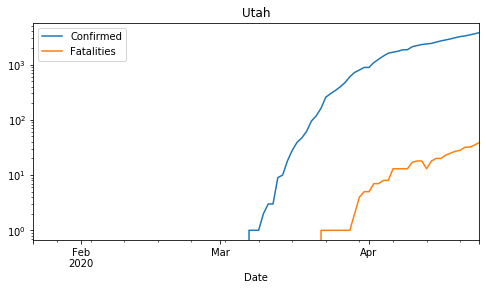

In [124]:
plot_Confirmed("Utah")

The B coefficient in the above equation corresponds to average number of contacts an average member of population connects with per day. The next piece, the S, is the total number of susceptible members at a given time (as a fraction of the total population) and the last one, I, is what gives us the total number of infected members at a given time (as a bare number, not a fraction). The γ here is the fraction of infected members expected to recover per day for a given illness. 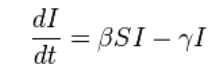

In [27]:
# using regression techniques 

In [125]:
def apply_rate(States):
    df=data
    df=df[df['State']==States]
    df['RateIncrease%']=(df['Confirmed']-df['Confirmed'].shift(1))/df['Confirmed'].shift(1)
    return df

In [126]:
dfs=[]
for i in data['State'].unique():
    dfs.append(apply_rate(i))

US=pd.concat(dfs)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [127]:
US['RateIncrease%']=US['RateIncrease%'].fillna(0)
US['RateIncrease%']=US['RateIncrease%'].replace([np.inf], 1)
US['MortalityRate']=US['Fatalities']/US['Confirmed']
US['MortalityRate']=US['MortalityRate'].fillna(0)
US['MortalityRate']=US['MortalityRate'].replace([np.inf], 1)

US['Deaths/1M Pop']=(US['Fatalities'])/(US['Population']/1000000)
US['Deaths/1M Pop']=US['Deaths/1M Pop'].fillna(0)
US['Deaths/1M Pop']=US['Deaths/1M Pop'].replace([np.inf], 1)

US['Cases/1M Pop']=(US['Confirmed'])/(US['Population']/1000000)
US['Cases/1M Pop']=US['Cases/1M Pop'].fillna(0)
US['Cases/1M Pop']=US['Cases/1M Pop'].replace([np.inf], 1)

In [128]:
US.tail()

,State,Date,Population,Fatalities,Confirmed,age,PopDensity,Land Area,CancerRate,Obesity,RateIncrease%,MortalityRate,Deaths/1M Pop,Cases/1M Pop
4789,Texas,2020-04-20,28995881,507.0,19751,34.8,40,676587.8,407.7,34.8,0.025493,0.025670,17.485242,681.165715
4790,Texas,2020-04-21,28995881,533.0,20574,34.8,40,676587.8,407.7,34.8,0.041669,0.025906,18.381921,709.549056
4791,Texas,2020-04-22,28995881,556.0,21321,34.8,40,676587.8,407.7,34.8,0.036308,0.026078,19.175137,735.311336
4792,Texas,2020-04-23,28995881,604.0,22650,34.8,40,676587.8,407.7,34.8,0.062333,0.026667,20.830545,781.145432
4793,Texas,2020-04-24,28995881,624.0,23642,34.8,40,676587.8,407.7,34.8,0.043797,0.026394,21.520298,815.357188


In [129]:
# excluding dates when there was no cases
avg_data=US[US['Confirmed']!=0]

In [130]:
avg_data=avg_data.groupby('State').agg({'Fatalities':'max', 
                         'Confirmed':'max', 
                         'age':'mean', 
                         'PopDensity':'mean',
                         'Land Area' :'mean',
                         'CancerRate':'mean',
                         'Obesity': "mean",
                         'RateIncrease%':'mean',
                         'MortalityRate':'mean',
                         'Deaths/1M Pop': 'mean',
                          'Cases/1M Pop': 'mean'})

In [131]:
TestingbyState=pd.read_csv("TestingbyState.csv")
TestingbyState.head()
TestingbyState.State= [c.strip() for c in TestingbyState.State]
TestingbyState.head()
TestingbyState=TestingbyState[['State','Tests/1M pop']]
TestingbyState['Tests/1M pop']=TestingbyState['Tests/1M pop'].str.replace(',' , '')
TestingbyState['Tests/1M pop']=TestingbyState['Tests/1M pop'].astype(float)

In [132]:
avg_data=avg_data.merge(TestingbyState,on='State')

In [134]:
avg_data.describe().to_csv("Summary_data.csv")

In [135]:
## Linear regresssion types
avg_data=avg_data.fillna(1717162.12)
avg_data.head()

,State,Fatalities,Confirmed,age,PopDensity,Land Area,CancerRate,Obesity,RateIncrease%,MortalityRate,Deaths/1M Pop,Cases/1M Pop,Tests/1M pop
0,Alabama,209.0,6026,39.2,37,131169.90,451.9,36.2,0.223094,0.017831,12.464608,427.406097,4236.0
1,Alaska,9.0,339,34.6,0,1717162.12,413.0,29.5,0.198269,0.019322,6.008310,218.905925,10470.0
2,Arizona,266.0,6045,37.9,23,294207.10,387.0,29.5,0.128172,0.011024,5.037518,143.808922,5834.0
3,Arkansas,47.0,2810,38.3,22,134770.00,467.8,37.1,0.455994,0.012941,5.448286,291.417819,6225.0
4,California,1621.0,41355,36.8,97,403932.00,404.8,25.8,0.138458,0.013536,5.565648,177.698318,4211.0


In [136]:
avg_data['RateIncrease%'].describe()

count    50.000000
mean      0.239836
std       0.059377
min       0.128172
25%       0.209728
50%       0.233054
75%       0.256541
max       0.455994
Name: RateIncrease%, dtype: float64

In [480]:
kn_mod=neighbors.KNeighborsRegressor(n_neighbors=3,algorithm='kd_tree')
kn_mod.fit(avg_data.iloc[:,[5,6,7,9]], avg_data.iloc[:,8])
predictions=kn_mod.predict(avg_data.iloc[:,[5,6,7,9]])
r2_score(avg_data.iloc[:,8],predictions) 

0.42903409359795985

In [139]:
Temperature_data=pd.read_fwf("climdiv-tmaxst-v1.0.0-20200406",header=None)
Temperature_data.columns=['StateYear','Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
Temperature_data['StateYear']=Temperature_data['StateYear'].astype(str)
Temperature_data['StateKey']=[x[0] if len(x) <9 else x[0:2] for x in Temperature_data['StateYear']]
Temperature_data=Temperature_data.loc[Temperature_data['StateYear'].str.len()<10]
Temperature_data['Year']=Temperature_data['StateYear'].str[-4:]
Temperature_data=Temperature_data[Temperature_data['Year']=='2020']
Temperature_data=Temperature_data[['Jan','Feb','March','StateKey']]
Temperature_data['3MTemp'] = Temperature_data.mean(axis=1)
Temperature_data=Temperature_data[['StateKey','3MTemp']]

In [140]:
State_codes=dict({1:'Alabama',2:'Arizona',3:'Arkansas',4:'California',5:'Colorado',6:'Connecticut',
                  7:'Delaware',8:'Florida',9:'Georgia',10:'Idaho',11:"Illinois",12:"Indiana",13:'Iowa',
                  14:'Kansas',15:"Kentucky",16:'Louisiana',17:"Maine",18:'Maryland',19:'Massachusetts',20:'Michigan',
                 21:'Minnesota',22:'Mississippi',23:'Missouri',24:'Montana',25:'Nebraska',26:'Nevada',27:"New Hampshire",
                 28:'New Jersey',29:"New Mexico",30:'New York',31:'North Carolina',32:'North Dakota',33:'Ohio',
                 34:'Oklahoma',35:'Oregon',36:'Pennsylvania',37:'Rhode Island',38:'South Carolina',39:'South Dakota',
                 40:'Tennessee',41:'Texas',42:'Utah',43:'Vermont',44:'Virginia',45:'Washington',46:'West Virginia',
                 47: 'Wisconsin',48:'Wyoming',50:'Alaska'})
State_codes=pd.DataFrame.from_dict(State_codes,orient='index')
State_codes=State_codes.reset_index()
State_codes.columns=['StateKey','State']
State_codes['StateKey']=State_codes['StateKey'].astype(str)

In [141]:
Temperature_data=Temperature_data.merge(State_codes,on='StateKey')
Temperature_data=Temperature_data.drop('StateKey',axis=1)

In [142]:
avg_data=avg_data.merge(Temperature_data,on='State')

In [374]:
avg_data.to_csv("avg_data.csv")

In [3]:
avg_data=pd.read_csv("avg_data.csv")
avg_data=avg_data.drop('Unnamed: 0',axis=1)
avg_data.head()

,State,Fatalities,Confirmed,age,PopDensity,Land Area,CancerRate,Obesity,RateIncrease%,MortalityRate,Deaths/1M Pop,Cases/1M Pop,Tests/1M pop,3MTemp
0,Alabama,209.0,6026,39.2,37,131169.90,451.9,36.2,0.223094,0.017831,12.464608,427.406097,4236.0,64.900000
1,Alaska,9.0,339,34.6,0,1717162.12,413.0,29.5,0.198269,0.019322,6.008310,218.905925,10470.0,10.200000
2,Arizona,266.0,6045,37.9,23,294207.10,387.0,29.5,0.128172,0.011024,5.037518,143.808922,5834.0,59.833333
3,Arkansas,47.0,2810,38.3,22,134770.00,467.8,37.1,0.455994,0.012941,5.448286,291.417819,6225.0,57.300000
4,California,1621.0,41355,36.8,97,403932.00,404.8,25.8,0.138458,0.013536,5.565648,177.698318,4211.0,58.466667


In [4]:
avg_data.describe().to_csv("Summary_data.csv")

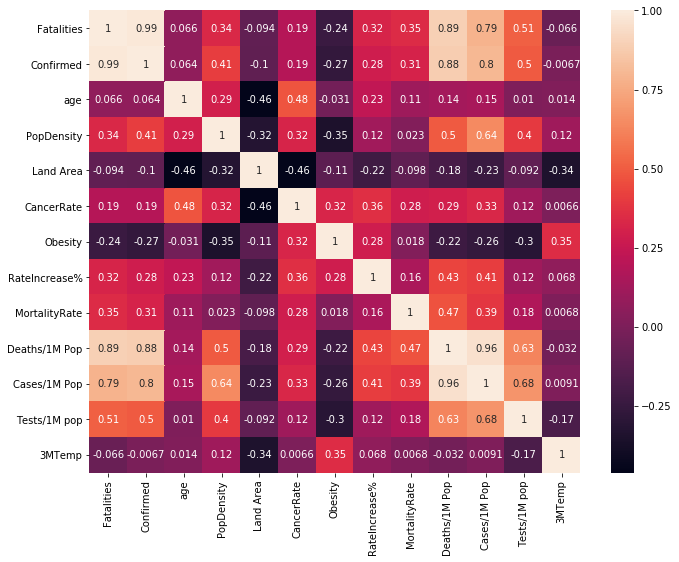

In [5]:
corr = avg_data.corr()
fig, ax = pyplot.subplots(figsize=[11,8.5])
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('Correlation.pdf')

In [33]:
X =avg_data.iloc[:,[5,6,7,9,13]]
VIF_test=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
#VIF_test.to_csv("VIF_test.csv")
VIF_test

Land Area         1.691307
CancerRate       82.541428
Obesity          94.572774
MortalityRate     5.559268
3MTemp           20.225132
dtype: float64

In [9]:
model_list = []
model_list.append(('LR', LinearRegression()))
model_list.append(('RFR', RandomForestRegressor(n_estimators=100,max_depth=1)))
model_list.append(('KNR', neighbors.KNeighborsRegressor(n_neighbors=13,algorithm='kd_tree')))
model_list.append(('Ridge', Ridge()))
model_list.append(('GBR', GradientBoostingRegressor(n_estimators=9,learning_rate=.1,max_depth=1)))

scores =[]
all_results=[]
for name, model in model_list: # name refers to the "Lr and such in model list"
    results = cross_val_score(model, avg_data.iloc[:,[5,6,7]], avg_data.iloc[:,8], cv=10, scoring='neg_mean_squared_error')
    results=np.sqrt(-results)
    scores.append(results)
    final_results = "%s: %f (%f)" % (name, results.mean(), results.std())
    all_results.append(final_results)
    print(final_results)

LR: 0.054132 (0.020509)
RFR: 0.049736 (0.024123)
KNR: 0.053086 (0.021805)
Ridge: 0.054128 (0.020511)
GBR: 0.049604 (0.024661)


In [243]:
# r squared for mortaliry rate increase

r2=[]
for _ in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(avg_data.iloc[:,[5,6,7,8]],avg_data.iloc[:,2], test_size=0.30)
    ridge=GradientBoostingRegressor(n_estimators=9,learning_rate=.1,max_depth=1)
    ridge.fit(X_train, y_train)
    predictions=ridge.predict(X_test)
    r2.append(r2_score(y_test,predictions)) 

In [11]:
ridge=GradientBoostingRegressor(n_estimators=9,learning_rate=.1,max_depth=1)
ridge.fit(avg_data.iloc[:,[2,5,6,7]], avg_data.iloc[:,8])
predictions=ridge.predict(avg_data.iloc[:,[2,5,6,7]])
(r2_score(avg_data.iloc[:,8],predictions)) 

0.24284718874006506

In [293]:
ridge.feature_importances_

array([0.        , 0.2107612 , 0.30452672, 0.48471209])

In [347]:
scores=pd.DataFrame(scores).T
scores.columns=['LR','RFR','KNR','ELAS','GBR']
all_results=pd.DataFrame(all_results)
all_results=all_results[0].str.split(":",expand=True)
all_results.to_csv("RateIncreaseModeling.csv")

In [7]:
avg_data.head()

,State,Fatalities,Confirmed,age,PopDensity,Land Area,CancerRate,Obesity,RateIncrease%,MortalityRate,Deaths/1M Pop,Cases/1M Pop,Tests/1M pop,3MTemp
0,Alabama,209.0,6026,39.2,37,131169.90,451.9,36.2,0.223094,0.017831,12.464608,427.406097,4236.0,64.900000
1,Alaska,9.0,339,34.6,0,1717162.12,413.0,29.5,0.198269,0.019322,6.008310,218.905925,10470.0,10.200000
2,Arizona,266.0,6045,37.9,23,294207.10,387.0,29.5,0.128172,0.011024,5.037518,143.808922,5834.0,59.833333
3,Arkansas,47.0,2810,38.3,22,134770.00,467.8,37.1,0.455994,0.012941,5.448286,291.417819,6225.0,57.300000
4,California,1621.0,41355,36.8,97,403932.00,404.8,25.8,0.138458,0.013536,5.565648,177.698318,4211.0,58.466667


In [54]:
# modelin
model_list = []
model_list.append(('LR', LinearRegression()))
model_list.append(('RFR', RandomForestRegressor(n_estimators=100,max_depth=1)))
model_list.append(('KNR', neighbors.KNeighborsRegressor(n_neighbors=9,algorithm='kd_tree')))
model_list.append(('Ridge', Ridge()))
model_list.append(('GBR', GradientBoostingRegressor(n_estimators=9,learning_rate=.1,max_depth=1)))
model_list.append(('ELAS', ElasticNet(l1_ratio=1)))


scores =[]
all_results=[]
for name, model in model_list: # name refers to the "Lr and such in model list"
    results = cross_val_score(model, avg_data.iloc[:,[2,4,8]], avg_data.iloc[:,1], cv=10, scoring='neg_mean_squared_error')
    results=np.sqrt(-results)
    scores.append(results)
    final_results = "%s: %f (%f)" % (name, results.mean(), results.std())
    all_results.append(final_results)
    print(final_results)

LR: 633.739527 (725.547347)
RFR: 1521.093723 (2255.934301)
KNR: 1217.137051 (2393.802524)
Ridge: 656.913257 (736.959463)
GBR: 1688.715032 (2314.333006)
ELAS: 635.061421 (728.389711)


In [396]:
scores=pd.DataFrame(scores).T
scores.columns=['LR','RFR','KNR','Ridge','GBR','ELAS']
all_results=pd.DataFrame(all_results)
all_results=all_results[0].str.split(":",expand=True)
all_results.to_csv("FatalityModeling.csv")

In [373]:
# basline
np.mean((abs(avg_data.iloc[:,1]-avg_data.iloc[:,1].median())))

954.8571428571429

In [326]:
#basline 
np.mean((abs(avg_data.iloc[:,1]-avg_data.iloc[:,1]*.008)))

1033.6842448979592

In [9]:
import statsmodels.api as sm

In [114]:
sm.OLS(avg_data.iloc[:,2],avg_data.iloc[:,[4]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Confirmed   R-squared (uncentered):                   0.297
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              20.32
Date:                Tue, 05 May 2020   Prob (F-statistic):                    4.20e-05
Time:                        16:48:43   Log-Likelihood:                         -585.58
No. Observations:                  49   AIC:                                      1173.
Df Residuals:                      48   BIC:                                      1175.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PopDensity   190.1546     42.179      4.508      0.000     105.349     274.961
==============================================================================
Omnibus:                       90.964   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2125.178
Skew:                           5.053   Prob(JB):                         0.00
Kurtosis:                      33.639   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
df= avg_data[avg_data['State']!= 'New York']

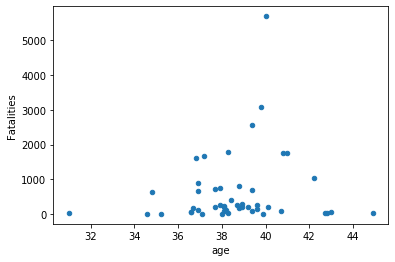

In [86]:
df.plot('age','Fatalities',kind='scatter')

In [30]:
X =avg_data.iloc[:,[2,4,6]]
VIF_test=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
#VIF_test.to_csv("VIF_test.csv")
VIF_test

Confirmed     1.447975
PopDensity    1.914259
CancerRate    1.635083
dtype: float64

In [397]:
# r squared for mortaliry rate increase
lm=LinearRegression()
lm.fit(avg_data.iloc[:,[2,4,6,7,8]], avg_data.iloc[:,1])
predictions=lm.predict(avg_data.iloc[:,[2,4,6,7,8]])
r2_score(avg_data.iloc[:,1],predictions) 

0.984531754078537

In [46]:
stats.pearsonr(avg_data['Obesity'],avg_data['RateIncrease%'])

(0.2842637562796944, 0.04775699260279787)